
# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

[Nós fornecemos-te alguns comentários para guiar sua linha de raciocínio enquanto você completa esse projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de você mergulhar na análise dos seus dados, explique a si mesmo o propósito do seu projeto e ações que planeja fazer.]

[Por favor, tenha em mente que estudar, modificar, e analisar dados é um processo iterativo. É normal retornar aos passos anteriores e corrigir/expandir algo para permitir os próximos passos.]

## Iniciação

[Carregue bibliotecas que você acredita que são necessárias para o projeto. Você pode perceber depois que você precisa de bibliotecas adicionais conforme você avança, o que é totalmente normal - apenas certifique-se de atualizar essa seção quando perceber isso.]

In [1]:
# Carregando todas as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

### Carregue dados

[Carregue os dados do projeto e dê uma olhada às informações gerais.]

In [2]:
# Carregue o arquivo com os dados em um DataFrame

data = pd.read_csv('/datasets/vehicles_us.csv')

### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada

[Entendendo os campos, explore-os para se familiarizar com os dados.]

In [3]:
# imprima as informações gerais/resumidas sobre o DataFrame

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [4]:
# imprima uma amostragem dos dados
data.tail(20)
data.head(20)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [8]:
model_fill = data.pivot_table(index='model',values=['model_year','cylinders'],aggfunc='median').reset_index()
model_fill

,model,cylinders,model_year
0,acura tl,6.0,2007.0
1,bmw x5,6.0,2010.0
2,buick enclave,6.0,2012.0
3,cadillac escalade,8.0,2009.0
4,chevrolet camaro,6.0,2013.0
...,...,...,...
95,toyota sienna,6.0,2008.0
96,toyota tacoma,6.0,2010.0
97,toyota tundra,8.0,2009.0
98,volkswagen jetta,4.0,2012.0


In [9]:
merge_data=data.merge(model_fill,on='model',how='left')
merge_data.head(20)

,price,model_year_x,model,condition,cylinders_x,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,cylinders_y,model_year_y
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,6.0,2010.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,8.0,2011.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,4.0,2012.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,8.0,2011.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,4.0,2014.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,6.0,2012.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,4.0,2009.0
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,6.0,2009.0
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,4.0,2013.0
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,6.0,2009.0


In [10]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year_x  47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders_x   46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  cylinders_y   51525 non-null  float64
 14  model_year_y  51525 non-null  float64
dtypes: float64(6), int64(2), object(7)
memory usage: 6.3+ MB


In [11]:
def preencher_model_year_x(row): 
    model_year_x = row['model_year_x']
    model_year_y = row['model_year_y']

    if pd.isna(model_year_x):
        return model_year_y  
    else:
        return model_year_x 

In [13]:
merge_data['model_year_x'] = merge_data.apply(preencher_model_year_x, axis=1)

In [15]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year_x  51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders_x   46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  cylinders_y   51525 non-null  float64
 14  model_year_y  51525 non-null  float64
dtypes: float64(6), int64(2), object(7)
memory usage: 6.3+ MB


In [16]:
def preencher_cylinders_x(row): 
    cylinders_x = row['cylinders_x']
    cylinders_y = row['cylinders_y']

    if pd.isna(cylinders_x):
        return cylinders_y  
    else:
        return cylinders_x 

In [17]:
merge_data['cylinders_x'] = merge_data.apply(preencher_cylinders_x, axis=1)

In [18]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year_x  51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders_x   51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  cylinders_y   51525 non-null  float64
 14  model_year_y  51525 non-null  float64
dtypes: float64(6), int64(2), object(7)
memory usage: 6.3+ MB


In [19]:
data=merge_data

In [22]:
data = data.drop(['cylinders_y','model_year_y'], axis=1)
data

,price,model_year_x,model,condition,cylinders_x,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [26]:
data=data.rename(columns={'model_year_x':'model_year','cylinders_x':'cylinders'})

In [27]:
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [28]:
data.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.412958,0.300342,-0.420299,NaN,-0.000682
model_year,0.412958,1.000000,-0.148091,-0.460923,NaN,-0.005328
cylinders,0.300342,-0.148091,1.000000,0.090262,NaN,0.003181
odometer,-0.420299,-0.460923,0.090262,1.000000,NaN,0.003804
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.000682,-0.005328,0.003181,0.003804,NaN,1.000000


[Descreva o que você percebeu na informação geral e na amostragem dos dados imprimida. Há algum problema que possa precisar de mais investigação e alterações?]

Pude perceber analisando as informações que as colunas model_year, cylinders, odometer, paint_color e is_4wd possuem valores ausentes. Também identifiquei que a coluna date_posted não estava no formato de datas do pandas. Não consegui relacionar os valores nulos de uma coluna com outra. Abaixo comecei a analisar os dados das colunas com valores nulos para propor a subsituição desses valores                   

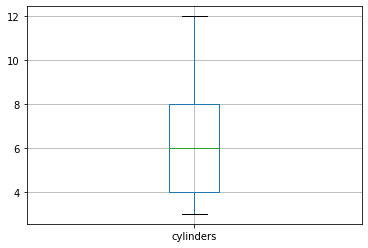

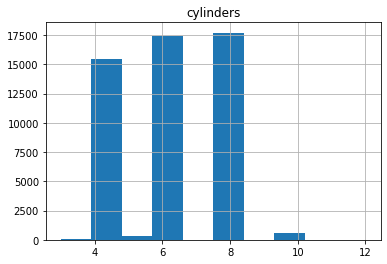

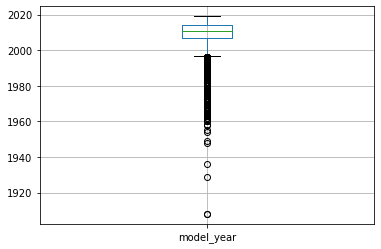

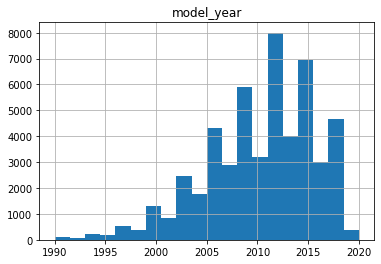

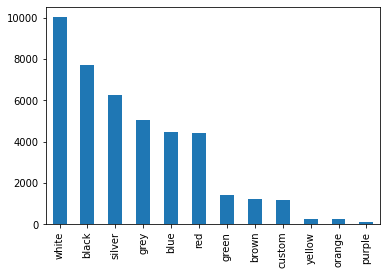

In [29]:
data.boxplot('cylinders')
plt.show()
data.hist('cylinders')
plt.show()
data.boxplot('model_year')
plt.show()
data.hist('model_year', bins=20, range=(1990,2020))
plt.show()
data['paint_color'].value_counts().plot(kind='bar')
plt.show()


In [30]:
data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [31]:
data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [32]:
data['model_year'].median()

2011.0

In [33]:
data['cylinders'].median()

6.0

[Essas colunas estão com tipos de dados inapropriados?]

Após analisar a distribuição dos dados através dos gráficos e tabelas, escolhi preencher os dados ausentes das colunas cylinders e model_year pela mediana, pois isso não interferiu no diagrama de caixa das variáveis. Na coluna is_4wd ficou claro de tratar-se de uma variável booleana, logo os valores nulos representavam na verdade O. Para a coluna cor troquei os valores ausentes por desconhecido. Não vi forma melhor para substituir esses dados. Ficou faltando apenas a coluna odometer com valores ausentes que vão ser tratados posteriormente.

In [34]:
data['is_4wd']=data['is_4wd'].fillna(0)
data['paint_color']=data['paint_color'].fillna('Unknow')



[Existem valores ausentes em todas as colunas ou apenas em algumas? Quais colunas contêm mais valores ausentes? Descreva brevemente o que você vê em 1-2 frases.]

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


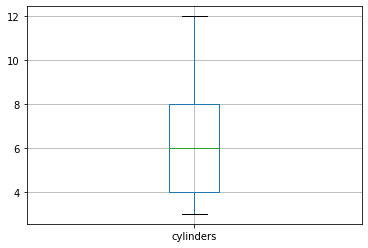

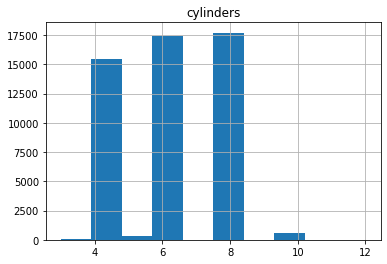

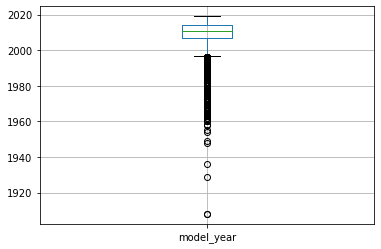

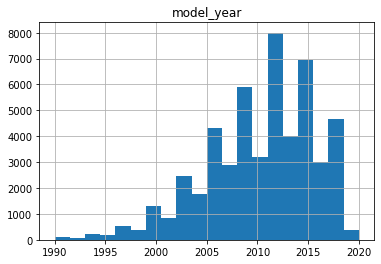

In [36]:
data.boxplot('cylinders')
plt.show()
data.hist('cylinders')
plt.show()
data.boxplot('model_year')
plt.show()
data.hist('model_year', bins=20, range=(1990,2020))
plt.show()

Os gráficos de diagrama de caixas model_year e cylinders pouco se alteraram. Obviamente, o histograma dessas variáveis mostrou aumento nos valores que escolhemos substituir pelos valores ausentes.

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

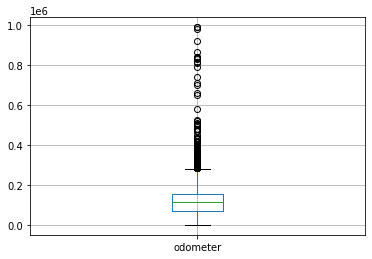

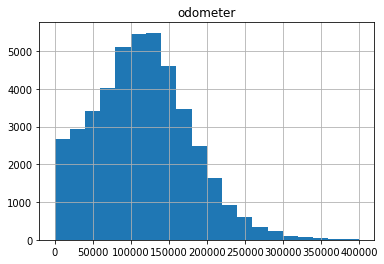

In [37]:
data.boxplot('odometer')
data.hist('odometer', bins=20, range=(0,400000))

In [38]:
data.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.412958,0.300342,-0.420299,0.315145,-0.000682
model_year,0.412958,1.000000,-0.148091,-0.460923,0.039077,-0.005328
cylinders,0.300342,-0.148091,1.000000,0.090262,0.407298,0.003181
odometer,-0.420299,-0.460923,0.090262,1.000000,0.036267,0.003804
is_4wd,0.315145,0.039077,0.407298,0.036267,1.000000,0.002003
days_listed,-0.000682,-0.005328,0.003181,0.003804,0.002003,1.000000


### Conclusões e próximos passos

[Formule suas conclusões sobre os dados iniciais. O que você acha que parece normal e o que não parece?]

[Explique seus próximos passos e como eles se correlacionam com as conclusões a que você chegou até agora. Especificamente, deve ficar claro quais partes dos dados devem ser tratadas para garantir que eles serão mais adequados para a análise requisitada.]

Após preencher quase todos os valores ausentes, seguimos a análise. Vemos na tabela de correlação, que model_year e price possuem a maior correlação linear positiva. Em segundo lugar temos cylinders e is_4wd. Já em termos de correlação negativa, vemos a maior entre model_year e odometer. Por isso, escolherei o model_year como proxy para preencher valores ausentes em odometer. Odometer e price tem a segunda maior correlação negativa. Seguirei analisando se os daos possuem valores atipicos ou que não fazem muito sentido. 

## Cuide dos valores ausentes (se houver algum)

[Estude os valores ausentes para cada coluna em mais detalhes e decida o que fazer com eles, baseado em hipóteses significativas.]

In [39]:
data.describe()
data.query('model_year<1990')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
63,30000,1966.0,ford mustang,excellent,6.0,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
255,5500,1981.0,chevrolet corvette,fair,8.0,gas,75000.0,automatic,coupe,blue,0.0,2019-01-15,49
357,16600,1975.0,chevrolet corvette,excellent,8.0,gas,75000.0,manual,coupe,Unknow,0.0,2019-03-09,69
358,18400,1975.0,chevrolet corvette,excellent,8.0,gas,18000.0,automatic,coupe,orange,0.0,2019-01-06,41
853,13900,1985.0,chevrolet corvette,like new,8.0,gas,25000.0,automatic,coupe,red,0.0,2018-10-03,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50451,49900,1973.0,chevrolet corvette,excellent,8.0,gas,NaN,manual,convertible,red,0.0,2018-06-09,41
50612,15500,1975.0,chevrolet camaro,excellent,8.0,gas,200.0,automatic,coupe,silver,0.0,2019-04-12,26
50939,1975,1988.0,chevrolet silverado 1500,good,8.0,gas,250000.0,automatic,pickup,black,0.0,2019-02-27,20
51152,3900,1988.0,ford f350,good,8.0,gas,30000.0,automatic,truck,Unknow,0.0,2018-08-27,43


In [40]:
def assign_model_year_group(model_year):
    if model_year >= 2014:
        return '2014 or more'
    elif 2011 <= model_year <=2013:
        return '2011-2013'
    elif 2007 <= model_year <=2010:
        return '2007-2010'
    elif 2000 <= model_year <=2006:
        return '2000-2006'
    elif 1990 <= model_year <= 1999:
        return '1990-1999'
    else:
        return '1989 or less'

In [41]:
assign_model_year_group(1982)

'1989 or less'

In [42]:
data['model_year_group'] = data['model_year'].apply(assign_model_year_group)

In [43]:
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_group
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,Unknow,1.0,2018-06-23,19,2011-2013
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011-2013
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2011-2013
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,Unknow,0.0,2019-03-22,9,2000-2006
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2014 or more
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2011-2013
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2000-2006
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,2007-2010
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,2011-2013


In [44]:
filter_data_odometer = data.query('~odometer.isna()')
filter_data_odometer.groupby('model_year_group')['odometer'].median()


model_year_group
1989 or less     82000.0
1990-1999       172000.0
2000-2006       158000.0
2007-2010       135000.0
2011-2013       111363.0
2014 or more     58243.5
Name: odometer, dtype: float64

In [45]:
def preencher_model_year(row): 
    odometer = row['odometer']
    model_year_group = row['model_year_group']

    if pd.isna(odometer):
        if model_year_group == '2014 or more':
          return (filter_data_odometer.groupby('model_year_group')['odometer'].median()[5])
        elif model_year_group == '2011-2013':
          return (filter_data_odometer.groupby('model_year_group')['odometer'].median()[4])
        elif model_year_group == '2007-2010':
          return (filter_data_odometer.groupby('model_year_group')['odometer'].median()[3])
        elif model_year_group == '2000-2006':
          return (filter_data_odometer.groupby('model_year_group')['odometer'].median()[2])
        elif model_year_group == '1990-1999':
          return (filter_data_odometer.groupby('model_year_group')['odometer'].median()[1])
        else:
          return (filter_data_odometer.groupby('model_year_group')['odometer'].median()[0])
    return odometer   

In [46]:
data['odometer'] = data.apply(preencher_model_year, axis=1)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51525 non-null  int64  
 1   model_year        51525 non-null  float64
 2   model             51525 non-null  object 
 3   condition         51525 non-null  object 
 4   cylinders         51525 non-null  float64
 5   fuel              51525 non-null  object 
 6   odometer          51525 non-null  float64
 7   transmission      51525 non-null  object 
 8   type              51525 non-null  object 
 9   paint_color       51525 non-null  object 
 10  is_4wd            51525 non-null  float64
 11  date_posted       51525 non-null  object 
 12  days_listed       51525 non-null  int64  
 13  model_year_group  51525 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.9+ MB


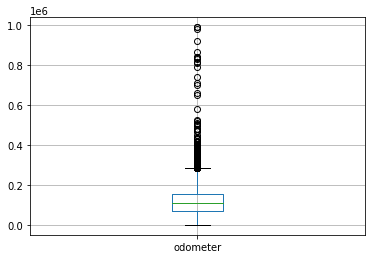

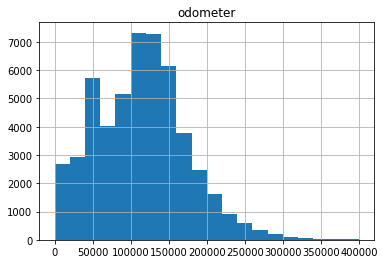

In [49]:
data.boxplot('odometer')
plt.show()
data.hist('odometer', bins=20, range=(0,400000))
plt.show()

## Corrija os tipos de dados

[Como os dados estão mais ou menos completos agora, corrija os tipos de dados se necessário.]

Corrige os dados ausentes em odometer criando categorias em model_year e substituindo pelas medianas desses agrupamentos. Escolhi model_year pois tinha a maior correlação linear com odometer.   

## Enriqueça os dados

[Adicione fatores adicionais aos dados para tornar a análise mas fácil.]

A coluna date_posted não está no formato pandas correto. Abaixo mudamos para o tipo de variável coreto para datas.

In [50]:
# Adicione valores data/hora para quando a propaganda estiver colocada

data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')


In [51]:
data['weekday']=data['date_posted'].dt.weekday

In [52]:
data['month']=data['date_posted'].dt.month

In [53]:
# Adicione a idade do veículo quando a propaganda for colocada
data['year']=data['date_posted'].dt.year
data['age']=data['year']-data['model_year']+(data['month']/12)


In [54]:
# Adicione a quilometragem média por ano
data['km_per_year']=data['odometer']/data['age']


In [55]:
# Isso deve ajudar a substituir os valores condicionais por alguma coisa que pode ser manipulada mais facilmente

data['condition1'] = data['condition'].where(data['condition']!="excellent", 3)
data['condition1'] = data['condition1'].where(data['condition1']!="good", 2)
data['condition1'] = data['condition1'].where(data['condition1']!="like new", 4)
data['condition1'] = data['condition1'].where(data['condition1']!="fair", 1)
data['condition1'] = data['condition1'].where(data['condition1']!="new", 5)
data['condition1'] = data['condition1'].where(data['condition1']!="salvage", 0)
data['condition1']= data['condition1'].astype('int')

## Verifique os dados limpos

[Já que os dados estão prontos para a análise, dê apenas uma rápida olhada neles. É útil ver o que exatamente você vai usar para a análise.]

Após ajustar o tipo de variável date_posted, adicionamos a tabela o dia da semana, o ano, o mês, a idade do veículo e a km média por ano para enriquecermos, posteriormente, nossas análises.

In [56]:
# imprima as informações gerais/resumidas sobre o DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  float64       
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  float64       
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  model_year_group  51525 non-null  object        
 14  weekday           5152

In [57]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,km_per_year,condition1
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,5.152500e+04,51525.000000
mean,12132.464920,2009.793954,6.121067,115079.743047,0.496303,39.55476,3.005434,6.628491,2018.307462,9.065882,1.742190e+04,2.637535
std,10040.803015,6.099296,1.657457,61834.142369,0.499991,28.20427,1.997759,3.474134,0.461447,6.104640,2.371022e+04,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2018.000000,0.083333,0.000000e+00,0.000000
25%,5000.000000,2007.000000,4.000000,68381.000000,0.000000,19.00000,1.000000,3.000000,2018.000000,4.750000,1.036066e+04,2.000000
50%,9000.000000,2011.000000,6.000000,112000.000000,0.000000,33.00000,3.000000,7.000000,2018.000000,8.083333,1.403571e+04,3.000000
75%,16839.000000,2014.000000,8.000000,154349.000000,1.000000,53.00000,5.000000,10.000000,2019.000000,12.250000,1.914894e+04,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000,6.000000,12.000000,2019.000000,110.583333,1.884000e+06,5.000000


In [58]:
data.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,km_per_year,condition1
price,1.000000,0.412958,0.300342,-0.420569,0.315145,-0.000682,-0.000343,-0.005653,0.004726,-0.412507,0.161467,0.221518
model_year,0.412958,1.000000,-0.148091,-0.483893,0.039077,-0.005328,-0.006900,-0.009608,0.008325,-0.998951,0.295730,0.269688
cylinders,0.300342,-0.148091,1.000000,0.091243,0.407298,0.003181,-0.003487,0.001471,-0.000329,0.148007,-0.015941,-0.065661
odometer,-0.420569,-0.483893,0.091243,1.000000,0.031194,0.002475,0.000679,0.008932,-0.006314,0.483415,-0.002546,-0.289963
is_4wd,0.315145,0.039077,0.407298,0.031194,1.000000,0.002003,0.003207,0.003891,-0.002476,-0.039045,0.045621,0.012856
days_listed,-0.000682,-0.005328,0.003181,0.002475,0.002003,1.000000,0.002734,-0.011519,0.011273,0.005629,-0.002804,-0.002404
weekday,-0.000343,-0.006900,-0.003487,0.000679,0.003207,0.002734,1.000000,0.006457,-0.007476,0.006635,-0.002050,0.001152
month,-0.005653,-0.009608,0.001471,0.008932,0.003891,-0.011519,0.006457,1.000000,-0.818207,-0.004824,-0.050884,-0.002355
year,0.004726,0.008325,-0.000329,-0.006314,-0.002476,0.011273,-0.007476,-0.818207,1.000000,0.028469,0.022888,0.003788
age,-0.412507,-0.998951,0.148007,0.483415,-0.039045,0.005629,0.006635,-0.004824,0.028469,1.000000,-0.296154,-0.269277


In [59]:
# imprima uma amostragem dos dados

data.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_group,weekday,month,year,age,km_per_year,condition1
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,Unknow,1.0,2018-06-23,19,2011-2013,5,6,2018,7.500000,19333.333333,2
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011-2013,4,10,2018,7.833333,11324.042553,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2011-2013,3,2,2019,6.166667,17837.837838,4
3,1500,2003.0,ford f-150,fair,8.0,gas,158000.0,automatic,pickup,Unknow,0.0,2019-03-22,9,2000-2006,4,3,2019,16.250000,9723.076923,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2014 or more,1,4,2019,2.333333,34672.714286,3
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2014 or more,2,6,2018,4.500000,12878.666667,3
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,2014 or more,3,12,2018,4.000000,19803.000000,3
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,2011-2013,0,1,2019,6.083333,17995.561644,3
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,Unknow,1.0,2018-07-16,19,2011-2013,0,7,2018,6.583333,15823.898734,3
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,2007-2010,4,2,2019,11.166667,13181.283582,3


## Estude os parâmetros fundamentais

[Escolha uma abordagem apropriada para estudar os parâmetros listados abaixo, preste atenção especial a como os valores atípicos afetam a forma e a legibilidade dos histogramas.]

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

[Se você achar que precisa repetir o mesmo trabalho várias vezes, pense a respeito de qual instrumento de codificação será útil para tal tarefa pera evitar duplicamentos no seu código.]

Para estudarmos corretamente os parâmetros apresentados, precisamos ver se eles possuem valores atípicos na amostra. Abaixo além do diagrama de caixas, apresentei os histogramas e gráfico de dispersão vendo como se relacionam com outras variaveis. 

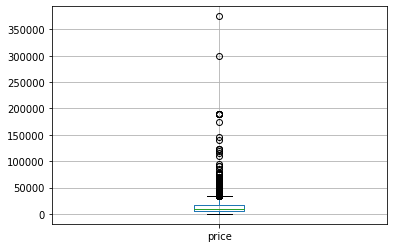

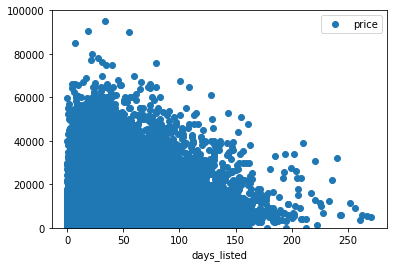

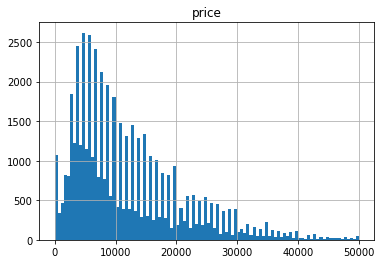

In [60]:
data.boxplot('price')
plt.show()
data.plot(y='price' , x='days_listed' ,style='o',ylim=(0,100000))
plt.show()
data.hist('price',bins=100,range=(0,50000))
plt.show()

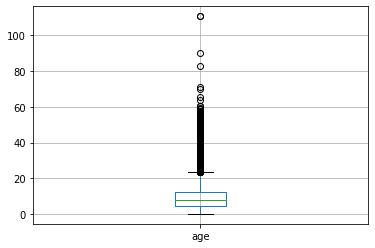

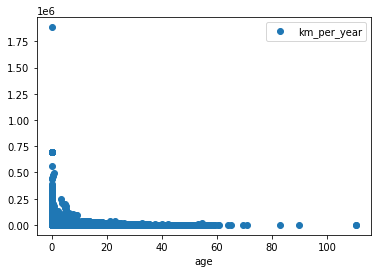

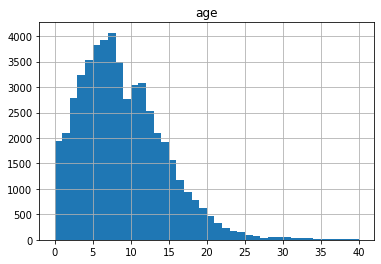

In [61]:
data.boxplot('age')
plt.show()
data.plot(x='age' , y='km_per_year' ,style='o')
plt.show()
data.hist('age',bins=40,range=(0,40))
plt.show()



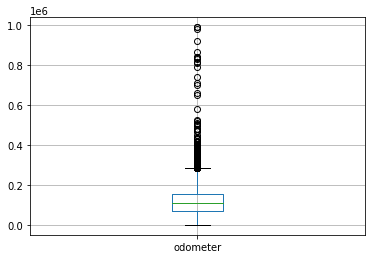

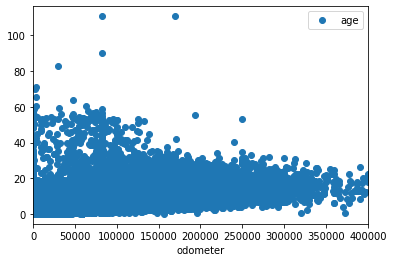

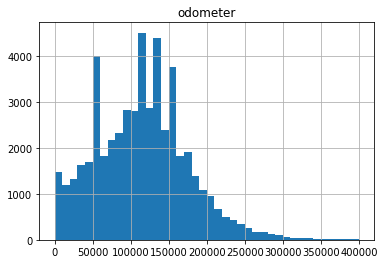

1.000000     13
9.250000      9
11.583333     9
13.250000     9
6.000000      9
             ..
17.500000     1
18.583333     1
53.500000     1
17.666667     1
50.250000     1
Name: age, Length: 276, dtype: int64

In [62]:
data.boxplot('odometer')
plt.show()
data.plot(x='odometer' , y='age' ,style='o',xlim=(0,400000))
plt.show()
data.hist('odometer',bins=40,range=(0,400000))
plt.show()
data.query('odometer<1000')['age'].value_counts()



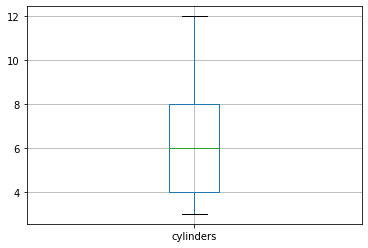

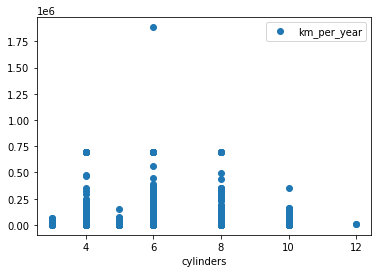

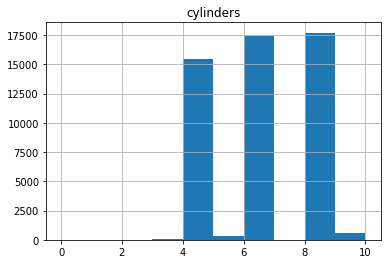

In [63]:
data.boxplot('cylinders')
plt.show()
data.plot(x='cylinders' , y='km_per_year' ,style='o')
plt.show()
data.hist('cylinders',bins=10,range=(0,10))
plt.show()



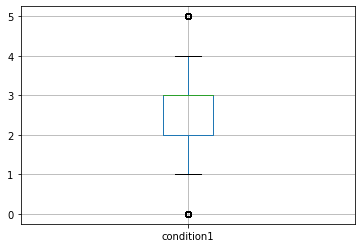

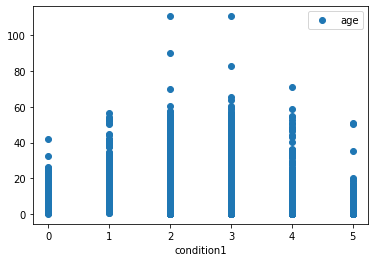

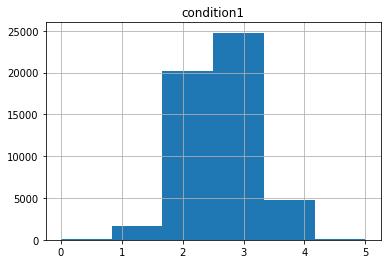

In [64]:
data.boxplot('condition1')
plt.show()
data.plot(x='condition1' , y='age' ,style='o')
plt.show()
data.hist('condition1',bins=6,range=(0,5))
plt.show()

In [65]:
data.duplicated().sum()

0

Não há linhas duplicatas na tabela.

## Estude e cuide dos valores ausentes

[Dado os resultados acima, determine quais colunas devem conter valores atípicos, e crie um DataFrame sem aqueles valores atípicos. Dica: Valores atípicos podem ser identificados se você definir os limites inferior/superior para intervalos normais de valores.]


As colunas: condition, odometer, age, price possuem valores atípicos. Odometer possui também valores muito baixos que não fazem sentido em relação ao ano de modelo do automóvel. Portanto, criarei uma tabela filtrada sem esses valores atípicos. 

In [66]:
# Determine o limite inferior para valores atípicos
filter_data = data.query('odometer>1000')


In [67]:
filter_data.describe()
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50683 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             50683 non-null  int64         
 1   model_year        50683 non-null  float64       
 2   model             50683 non-null  object        
 3   condition         50683 non-null  object        
 4   cylinders         50683 non-null  float64       
 5   fuel              50683 non-null  object        
 6   odometer          50683 non-null  float64       
 7   transmission      50683 non-null  object        
 8   type              50683 non-null  object        
 9   paint_color       50683 non-null  object        
 10  is_4wd            50683 non-null  float64       
 11  date_posted       50683 non-null  datetime64[ns]
 12  days_listed       50683 non-null  int64         
 13  model_year_group  50683 non-null  object        
 14  weekday           5068

In [68]:
filter_data=filter_data.query('price>1000')

In [69]:
filter_data.describe()


,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,km_per_year,condition1
count,49178.000000,49178.000000,49178.000000,49178.000000,49178.000000,49178.000000,49178.000000,49178.000000,49178.000000,49178.000000,4.917800e+04,49178.000000
mean,12528.044044,2009.784914,6.111330,117640.695138,0.495608,39.591687,3.005002,6.626805,2018.307821,9.075140,1.751954e+04,2.637012
std,9944.863720,5.991445,1.634778,59886.145584,0.499986,28.249248,1.996137,3.474955,0.461597,5.996495,2.308140e+04,0.700502
min,1005.000000,1908.000000,3.000000,1011.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.083333,2.265124e+01,0.000000
25%,5500.000000,2007.000000,4.000000,73500.000000,0.000000,19.000000,1.000000,3.000000,2018.000000,4.833333,1.057904e+04,2.000000
50%,9750.000000,2011.000000,6.000000,114091.000000,0.000000,33.000000,3.000000,7.000000,2018.000000,8.083333,1.414101e+04,3.000000
75%,16995.000000,2014.000000,8.000000,155421.000000,1.000000,53.000000,5.000000,10.000000,2019.000000,12.166667,1.921928e+04,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.000000,6.000000,12.000000,2019.000000,110.583333,1.884000e+06,5.000000


In [70]:
filter_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_group,weekday,month,year,age,km_per_year,condition1
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,Unknow,1.0,2018-06-23,19,2011-2013,5,6,2018,7.500000,19333.333333,2
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011-2013,4,10,2018,7.833333,11324.042553,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2011-2013,3,2,2019,6.166667,17837.837838,4
3,1500,2003.0,ford f-150,fair,8.0,gas,158000.0,automatic,pickup,Unknow,0.0,2019-03-22,9,2000-2006,4,3,2019,16.250000,9723.076923,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2014 or more,1,4,2019,2.333333,34672.714286,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2011-2013,2,10,2018,5.833333,15109.028571,4
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2000-2006,2,11,2018,16.916667,10729.064039,0
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,2007-2010,3,11,2018,9.916667,12907.563025,3
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,2011-2013,0,7,2018,5.583333,24998.149254,2


In [71]:
# Determine o limite superior para valores atípicos
q1_odometer=filter_data['odometer'].quantile(0.25)
q3_odometer=filter_data['odometer'].quantile(0.75)
q1_odometer

73500.0

In [72]:
q3_odometer

155421.0

In [73]:
IQR_odometer=q3_odometer-q1_odometer
lim_sup_odometer = (q3_odometer+1.5*IQR_odometer)
lim_sup_odometer 

278302.5

In [74]:
filter_data = filter_data.query('odometer <= @lim_sup_odometer')

In [75]:
filter_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,km_per_year,condition1
count,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,4.866500e+04,48665.000000
mean,12589.908641,2009.849769,6.103709,115334.105199,0.494770,39.603534,3.004562,6.628439,2018.307572,9.010173,1.739771e+04,2.642741
std,9963.596179,5.961973,1.634081,54797.886759,0.499978,28.260799,1.996540,3.474430,0.461493,5.966968,2.284101e+04,0.698021
min,1005.000000,1908.000000,3.000000,1011.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.083333,2.265124e+01,0.000000
25%,5500.000000,2007.000000,4.000000,73000.000000,0.000000,19.000000,1.000000,3.000000,2018.000000,4.833333,1.053333e+04,2.000000
50%,9851.000000,2011.000000,6.000000,113200.000000,0.000000,33.000000,3.000000,7.000000,2018.000000,8.000000,1.407895e+04,3.000000
75%,16995.000000,2014.000000,8.000000,153602.000000,1.000000,53.000000,5.000000,10.000000,2019.000000,12.083333,1.910204e+04,3.000000
max,375000.000000,2019.000000,12.000000,278000.000000,1.000000,271.000000,6.000000,12.000000,2019.000000,110.583333,1.884000e+06,5.000000


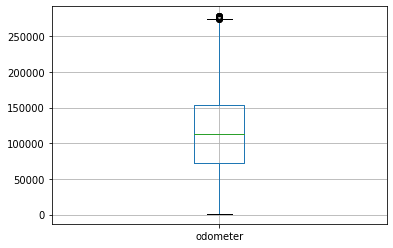

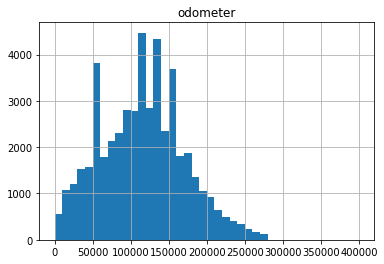

In [76]:

filter_data.boxplot('odometer')
plt.show()
filter_data.hist('odometer',bins=40,range=(0,400000))
plt.show()

In [77]:
filter_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,km_per_year,condition1
count,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,4.866500e+04,48665.000000
mean,12589.908641,2009.849769,6.103709,115334.105199,0.494770,39.603534,3.004562,6.628439,2018.307572,9.010173,1.739771e+04,2.642741
std,9963.596179,5.961973,1.634081,54797.886759,0.499978,28.260799,1.996540,3.474430,0.461493,5.966968,2.284101e+04,0.698021
min,1005.000000,1908.000000,3.000000,1011.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.083333,2.265124e+01,0.000000
25%,5500.000000,2007.000000,4.000000,73000.000000,0.000000,19.000000,1.000000,3.000000,2018.000000,4.833333,1.053333e+04,2.000000
50%,9851.000000,2011.000000,6.000000,113200.000000,0.000000,33.000000,3.000000,7.000000,2018.000000,8.000000,1.407895e+04,3.000000
75%,16995.000000,2014.000000,8.000000,153602.000000,1.000000,53.000000,5.000000,10.000000,2019.000000,12.083333,1.910204e+04,3.000000
max,375000.000000,2019.000000,12.000000,278000.000000,1.000000,271.000000,6.000000,12.000000,2019.000000,110.583333,1.884000e+06,5.000000


In [78]:
q1_age=filter_data['age'].quantile(0.25)
q3_age=filter_data['age'].quantile(0.75)
IQR_age=q3_age-q1_age
lim_sup_age = (q3_age + 1.5*IQR_age)
lim_sup_age

22.958333333333336

In [79]:
filter_data = filter_data.query('age <= @lim_sup_age')


In [80]:
filter_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,km_per_year,condition1
count,47719.000000,47719.000000,47719.000000,47719.000000,47719.000000,47719.000000,47719.000000,47719.000000,47719.000000,47719.000000,4.771900e+04,47719.000000
mean,12679.141893,2010.293552,6.082923,115101.499979,0.497496,39.586873,3.001132,6.630022,2018.307236,8.566186,1.765133e+04,2.649846
std,9962.149635,4.907863,1.632627,54615.864602,0.499999,28.242586,1.996224,3.472546,0.461353,4.913104,2.299131e+04,0.694356
min,1095.000000,1996.000000,3.000000,1011.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.083333,7.959184e+01,0.000000
25%,5500.000000,2007.000000,4.000000,72978.000000,0.000000,19.000000,1.000000,3.000000,2018.000000,4.750000,1.078066e+04,2.000000
50%,9950.000000,2011.000000,6.000000,113000.000000,0.000000,33.000000,3.000000,7.000000,2018.000000,7.916667,1.421655e+04,3.000000
75%,16999.000000,2014.000000,8.000000,153000.000000,1.000000,53.000000,5.000000,10.000000,2019.000000,11.916667,1.926691e+04,3.000000
max,375000.000000,2019.000000,12.000000,278000.000000,1.000000,271.000000,6.000000,12.000000,2019.000000,22.916667,1.884000e+06,5.000000


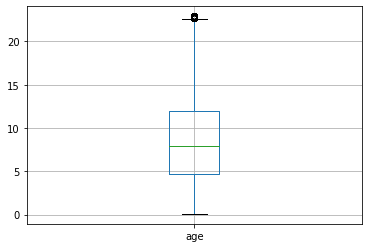

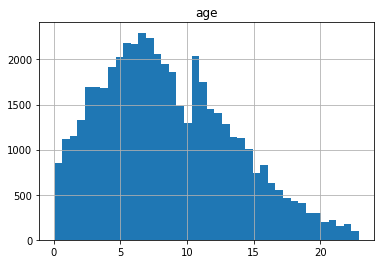

In [81]:
filter_data.boxplot('age')
plt.show()
filter_data.hist('age',bins=40)
plt.show()

In [82]:
q1_price=filter_data['price'].quantile(0.25)
q3_price=filter_data['price'].quantile(0.75)
IQR_price=q3_price-q1_price
lim_sup_price = (q3_price + 1.5*IQR_price)
lim_sup_price


34247.5

In [83]:
filter_data = filter_data.query('price <= @lim_sup_price')


In [84]:
filter_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,km_per_year,condition1
count,46094.000000,46094.000000,46094.000000,46094.000000,46094.000000,46094.000000,46094.000000,46094.000000,46094.000000,46094.000000,4.609400e+04,46094.000000
mean,11607.922593,2010.094112,6.039550,117390.940784,0.483924,39.593092,3.002256,6.629626,2018.307198,8.765555,1.707032e+04,2.633705
std,7675.145756,4.842945,1.633101,53717.329192,0.499747,28.253839,1.994883,3.472799,0.461337,4.848351,2.032843e+04,0.689191
min,1095.000000,1996.000000,3.000000,1011.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.083333,7.959184e+01,0.000000
25%,5500.000000,2007.000000,4.000000,77000.000000,0.000000,19.000000,1.000000,3.000000,2018.000000,5.000000,1.075909e+04,2.000000
50%,9499.000000,2011.000000,6.000000,116000.000000,0.000000,33.000000,3.000000,7.000000,2018.000000,8.083333,1.413145e+04,3.000000
75%,15999.000000,2014.000000,8.000000,155000.000000,1.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,1.898423e+04,3.000000
max,34200.000000,2019.000000,12.000000,278000.000000,1.000000,271.000000,6.000000,12.000000,2019.000000,22.916667,1.884000e+06,5.000000


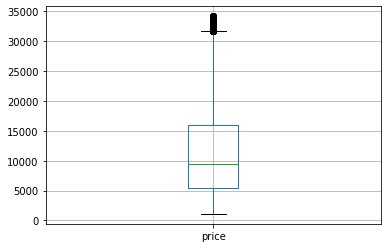

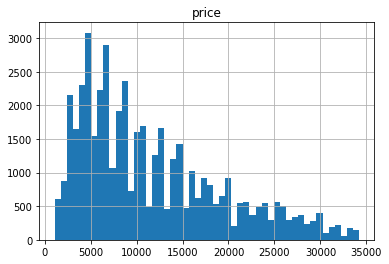

In [85]:
filter_data.boxplot('price')
plt.show()
filter_data.hist('price',bins=50)
plt.show()

In [86]:
q1_km_per_year=filter_data['km_per_year'].quantile(0.25)
q3_km_per_year=filter_data['km_per_year'].quantile(0.75)
IQR_km_per_year=q3_km_per_year-q1_km_per_year
lim_sup_km_per_year = (q3_km_per_year + 1.5*IQR_km_per_year)
lim_sup_km_per_year

31321.932093044925

In [87]:
filter_data = filter_data.query('km_per_year <= @lim_sup_km_per_year')

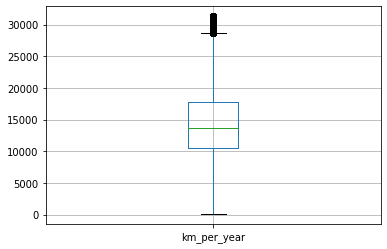

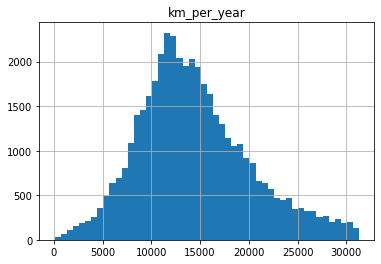

In [88]:
filter_data.boxplot('km_per_year')
plt.show()
filter_data.hist('km_per_year',bins=50)
plt.show()

In [89]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43210 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             43210 non-null  int64         
 1   model_year        43210 non-null  float64       
 2   model             43210 non-null  object        
 3   condition         43210 non-null  object        
 4   cylinders         43210 non-null  float64       
 5   fuel              43210 non-null  object        
 6   odometer          43210 non-null  float64       
 7   transmission      43210 non-null  object        
 8   type              43210 non-null  object        
 9   paint_color       43210 non-null  object        
 10  is_4wd            43210 non-null  float64       
 11  date_posted       43210 non-null  datetime64[ns]
 12  days_listed       43210 non-null  int64         
 13  model_year_group  43210 non-null  object        
 14  weekday           4321

In [90]:
# Armazene os dados sem os valores atípicos em um DataFrame separado

filter_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,km_per_year,condition1
count,43210.000000,43210.000000,43210.000000,43210.000000,43210.000000,43210.000000,43210.000000,43210.000000,43210.000000,43210.000000,43210.000000,43210.000000
mean,11196.214349,2009.674196,6.048091,118583.615170,0.482666,39.635084,3.001805,6.631544,2018.311016,9.189449,14411.338349,2.623907
std,7505.450662,4.689894,1.628125,53142.398191,0.499705,28.312050,1.994878,3.491004,0.462915,4.690532,5746.304503,0.686390
min,1095.000000,1996.000000,3.000000,1011.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.083333,79.591837,0.000000
25%,5295.000000,2007.000000,4.000000,79978.500000,0.000000,19.000000,1.000000,3.000000,2018.000000,5.583333,10491.214293,2.000000
50%,8995.000000,2010.000000,6.000000,117795.000000,0.000000,33.000000,3.000000,7.000000,2018.000000,8.500000,13697.148114,3.000000
75%,15500.000000,2013.000000,8.000000,156000.000000,1.000000,53.000000,5.000000,10.000000,2019.000000,12.250000,17770.021978,3.000000
max,34200.000000,2019.000000,12.000000,278000.000000,1.000000,271.000000,6.000000,12.000000,2019.000000,22.916667,31305.866667,5.000000


Usei os diagramas de caixa para retirar as linhas com valores atípicos no nível superior. Escolhi também excluir da análise os anúncios onde a quilometragem e o preço eram muito baixos. Parecem ser valores irreais para os tipos de carros apresentados. 

## Estude os parâmetros fundamentais sem valores atípicos

[Use os dados filtrados para fazer novos gráficos. Compare com os anteriores (que incluem os valores atípicos). Tire conclusões para cada um.]

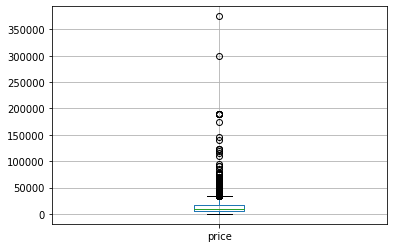

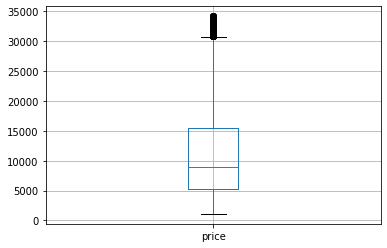

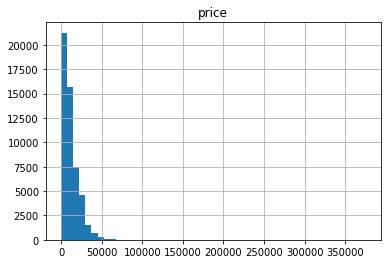

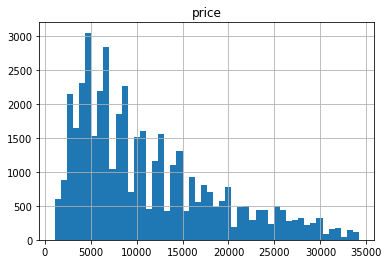

In [91]:
data.boxplot('price')
plt.show()
filter_data.boxplot('price')
plt.show()
data.hist('price',bins=50)
plt.show()
filter_data.hist('price',bins=50)
plt.show()

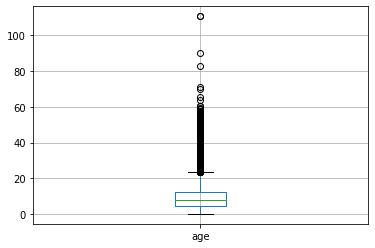

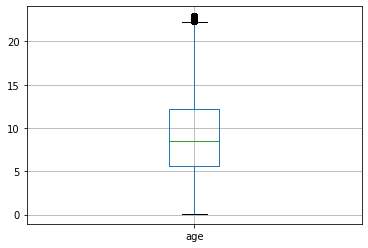

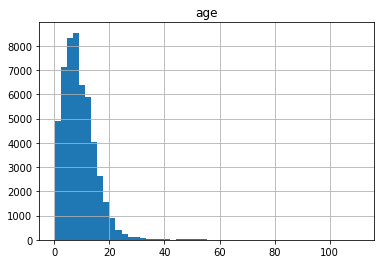

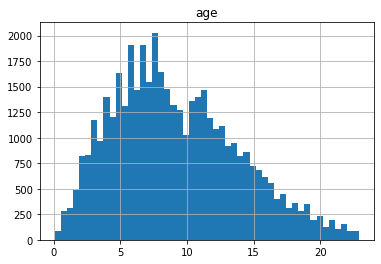

In [92]:
data.boxplot('age')
plt.show()
filter_data.boxplot('age')
plt.show()
data.hist('age',bins=50)
plt.show()
filter_data.hist('age',bins=50)
plt.show()

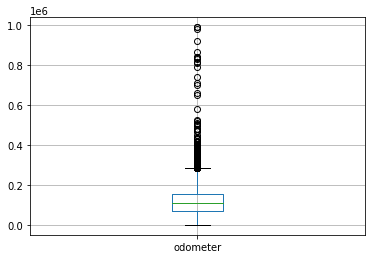

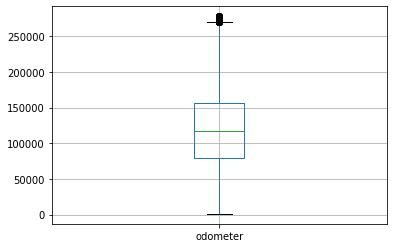

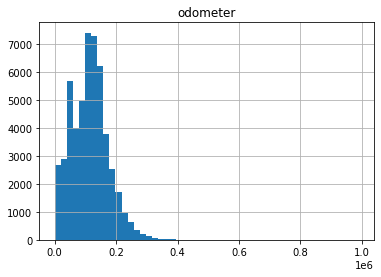

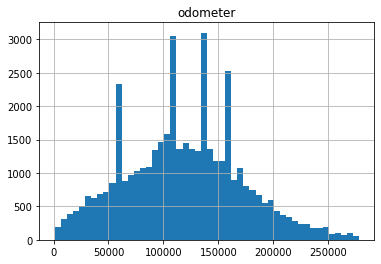

In [93]:
data.boxplot('odometer')
plt.show()
filter_data.boxplot('odometer')
plt.show()
data.hist('odometer',bins=50)
plt.show()
filter_data.hist('odometer',bins=50)
plt.show()

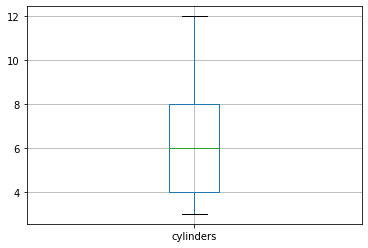

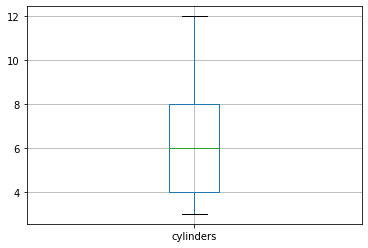

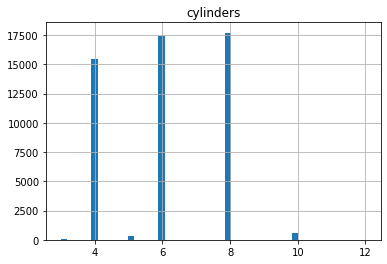

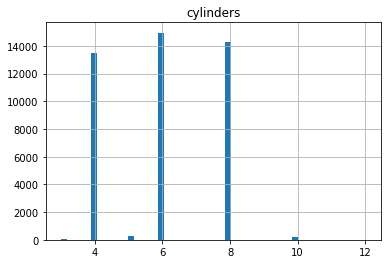

In [94]:
data.boxplot('cylinders')
plt.show()
filter_data.boxplot('cylinders')
plt.show()
data.hist('cylinders',bins=50)
plt.show()
filter_data.hist('cylinders',bins=50)
plt.show()

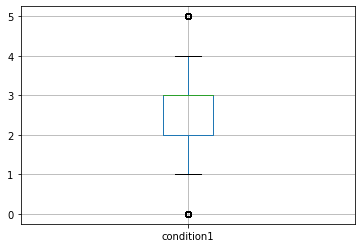

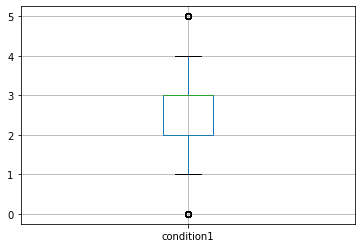

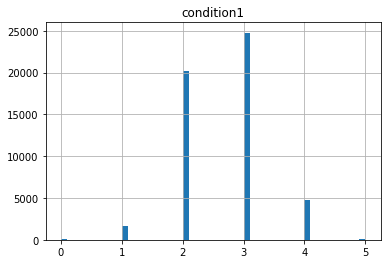

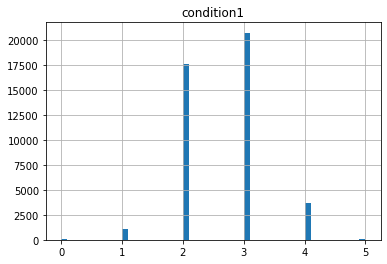

In [95]:
data.boxplot('condition1')
plt.show()
filter_data.boxplot('condition1')
plt.show()
data.hist('condition1',bins=50)
plt.show()
filter_data.hist('condition1',bins=50)
plt.show()

## Tempo de vida das propagandas

[Estude quantos dias propagandas foram exibidas (`days_listed`). Calcule a média e a mediana. Descreva o tempo de vida útil comum de uma propaganda. Determine quando as propagandas foram removidas rapidamente, e quando elas foram listadas por um tempo anormalmente longo.]

In [96]:
filter_data['days_listed'].mean()

39.63508447118723

Uma propaganda fica em média listada por 39,6 dias.

In [97]:
filter_data['days_listed'].median()

33.0

Porém a mediana do tempo é 33 dias.

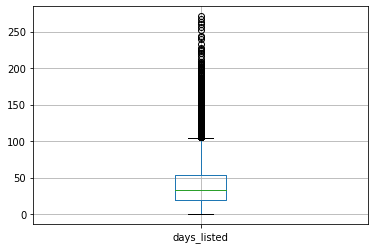

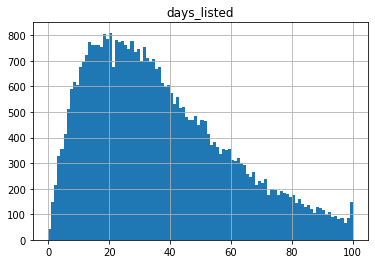

In [98]:
filter_data.boxplot('days_listed')
plt.show()
filter_data.hist('days_listed',bins=100, range=(0,100))
plt.show()

In [99]:
q1_days_listed=filter_data['days_listed'].quantile(0.25)
q1_days_listed


19.0

In [100]:
q3_days_listed=filter_data['days_listed'].quantile(0.75)
q3_days_listed

53.0

In [101]:
IQR_days_listed=q3_days_listed-q1_days_listed
lim_inf_days_listed = (q1_days_listed - 1.5*IQR_days_listed)
lim_inf_days_listed

-32.0

In [102]:
lim_sup_days_listed = (q3_days_listed + 1.5*IQR_days_listed)
lim_sup_days_listed

104.0

Não há valores atípicos inferiores na amostra, apenas superiores. Podemos considerar 33 dias como o tempo mais comum. Um anúncio pode ser considerado removido rapidamente, quando fica menos que 19 dias, pois esse é o corte do primeiro quartil. Já os anuncios que ficam mais de 104 dias, podem ser considerados atipicos e ficam tempo demais até serem removidos. Podemos ver isso no gráfico boxplot de days_listed.    

## Média de preços por cada tipo de veículo

[Analise o número de propagandas e o preço médio para cada tipo de veículo. Construa um gráfico mostrando a dependência do número de propagandas em relação ao tipo de veículo. Selecione os dois tipos com os maiores números de propagandas.]

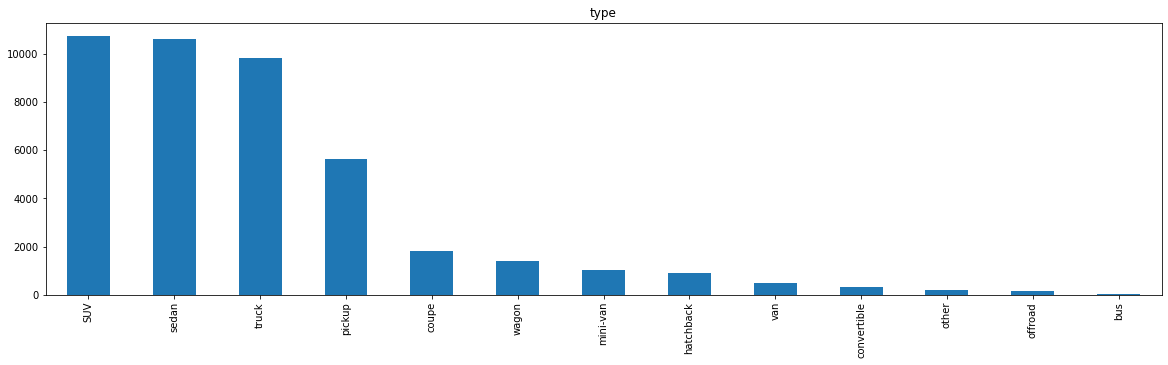

In [103]:
filter_data['type'].value_counts().plot(kind='bar',figsize=(20,5),title='type')
plt.show()

No gráfico acima visualizamos quais os tipos de veículos possuem mais propagandas. 

In [104]:
filter_data.pivot_table(index='type',values = 'price', aggfunc='mean').sort_values('price',ascending=False)

,price
type,
bus,19276.947368
truck,15169.667344
pickup,14669.831854
offroad,14600.218935
coupe,14034.873068
convertible,13208.800000
SUV,10470.251560
other,10269.081731
wagon,9056.355301


A tabela acima sinaliza o preço médio por tipo de veículo. Bus e truck tem na média o maior preço. O que faz sentido por serem veículos maiores.

In [105]:
filter_data.pivot_table(index='type',values = 'price', aggfunc='count').sort_values('price',ascending=False)

,price
type,
SUV,10737
sedan,10628
truck,9842
pickup,5632
coupe,1812
wagon,1396
mini-van,1034
hatchback,914
van,509


Os tipos mais populares são: SUV e Sedan

## Fatores de preço

[Quais fatores impactam mais o preço? Pegue cada um dos tipos populares que você detectou no estágio anterior e estude se o preço depende da idade, quilometragem, condição, tipo de transmissão e cor. Para variáveis categóricas (tipo de transmissão e cor), construa gráficos de extremos e quartis, e crie gráficos de dispersão para o restante. Quando analisar variáveis categóricas, perceba que as categorias devem ter pelo menos 50 propagandas, caso contrário, seus parâmetros não serão válidos para analisar.]

[Faça uso da matriz de correlação e gráficos de correlação]

In [106]:
filter_data.duplicated().sum()

0

Começamos explorando os dados do tipo de veiculo Sedan:

In [107]:
filter_data_type_sedan = filter_data.query('type == "sedan"')
filter_data_type_sedan['type'].value_counts()
filter_data_type_sedan.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,km_per_year,condition1
price,1.000000,0.672899,0.010578,-0.661496,0.127118,0.002500,-0.004158,-0.019485,0.026906,-0.671215,0.149135,0.304612
model_year,0.672899,1.000000,-0.176277,-0.653832,0.033013,0.003908,0.007313,-0.033672,0.040351,-0.997785,0.492505,0.255896
cylinders,0.010578,-0.176277,1.000000,0.128570,0.117073,-0.003523,-0.010443,-0.001200,-0.007883,0.175303,-0.070198,-0.067479
odometer,-0.661496,-0.653832,0.128570,1.000000,-0.017762,-0.005331,-0.008081,0.023569,-0.019907,0.653209,0.215377,-0.298692
is_4wd,0.127118,0.033013,0.117073,-0.017762,1.000000,0.002662,-0.018989,0.011179,-0.007962,-0.033111,0.024579,0.003002
days_listed,0.002500,0.003908,-0.003523,-0.005331,0.002662,1.000000,0.012489,-0.010842,0.015433,-0.002955,-0.005299,-0.007534
weekday,-0.004158,0.007313,-0.010443,-0.008081,-0.018989,0.012489,1.000000,0.006678,-0.008162,-0.007750,0.007027,0.003420
month,-0.019485,-0.033672,-0.001200,0.023569,0.011179,-0.010842,0.006678,1.000000,-0.822045,0.012424,0.014966,-0.001934
year,0.026906,0.040351,-0.007883,-0.019907,-0.007962,0.015433,-0.008162,-0.822045,1.000000,0.013035,-0.050622,0.009183
age,-0.671215,-0.997785,0.175303,0.653209,-0.033111,-0.002955,-0.007750,0.012424,0.013035,1.000000,-0.497020,-0.254989


Contagem e média de Sedan por tipo de transmissão:

In [108]:
filter_data_type_sedan.pivot_table(index='transmission',values = 'price', aggfunc='count').sort_values('price',ascending=False)

,price
transmission,
automatic,10045
manual,519
other,64


In [109]:
filter_data_type_sedan.pivot_table(index='transmission',values = 'price', aggfunc='mean').sort_values('price',ascending=False)

,price
transmission,
other,7478.296875
automatic,6995.305326
manual,5628.437380


Agora relacionando o preço com a cor:

In [110]:
d =filter_data_type_sedan.pivot_table(index='paint_color',values = 'price', aggfunc='count').sort_values('price',ascending=False)
d

,price
paint_color,
Unknow,1900
silver,1800
black,1549
grey,1435
white,1294
blue,1100
red,831
custom,244
brown,242


In [111]:
filter_data_type_sedan_color_index= d.query('price>50').index
filter_data_type_sedan_color_index

Index(['Unknow', 'silver', 'black', 'grey', 'white', 'blue', 'red', 'custom',
       'brown', 'green'],
      dtype='object', name='paint_color')

In [112]:
filter_data_type_sedan_color=filter_data_type_sedan.query('paint_color in @filter_data_type_sedan_color_index')
filter_data_type_sedan_color.pivot_table(index='paint_color',values = 'price', aggfunc='count').sort_values('price',ascending=False)

,price
paint_color,
Unknow,1900
silver,1800
black,1549
grey,1435
white,1294
blue,1100
red,831
custom,244
brown,242


In [113]:
filter_data_type_sedan_color.pivot_table(index='paint_color',values = 'price', aggfunc='mean').sort_values('price',ascending=False)

,price
paint_color,
white,7486.124420
black,7458.866365
red,7148.536703
Unknow,7007.439474
grey,6890.639721
custom,6867.073770
silver,6712.251667
blue,6418.830000
brown,5285.305785


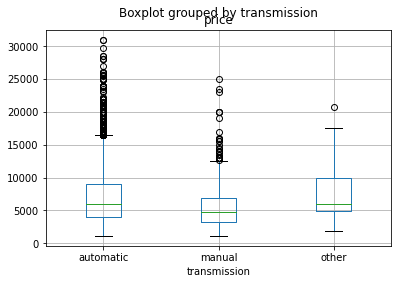

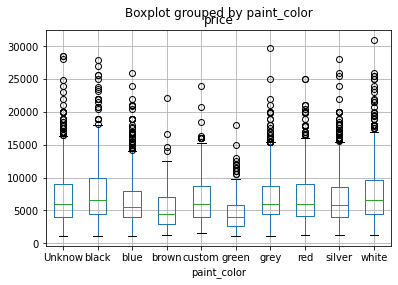

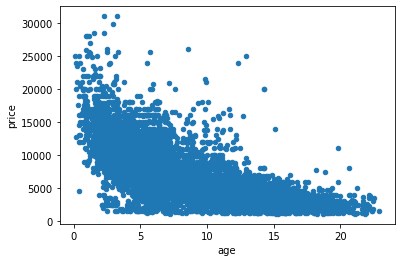

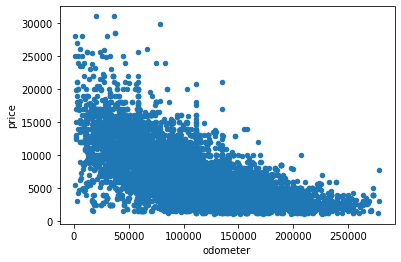

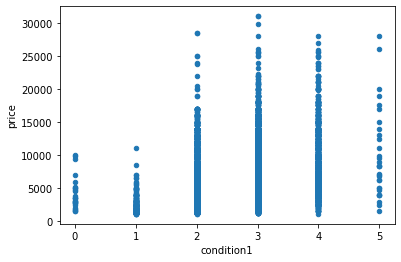

In [114]:
filter_data_type_sedan.boxplot(column='price',by='transmission')
plt.show()
filter_data_type_sedan_color.boxplot(column='price',by='paint_color')
plt.show()
filter_data_type_sedan.plot(y='price',x='age',kind='scatter')
plt.show()
filter_data_type_sedan.plot(y='price',x='odometer',kind='scatter')
plt.show()
filter_data_type_sedan.plot(y='price',x='condition1',kind='scatter')
plt.show()

Os gráficos acima mostram bem como as variavies se relacionam como preço do tipo Sedan. Abaixo fiz exatamente as mesmas analises para o tipo SUV

In [115]:
filter_data_type_SUV = filter_data.query('type == "SUV"')
filter_data_type_SUV['type'].value_counts()
filter_data_type_SUV.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,km_per_year,condition1
price,1.000000,0.640865,0.038649,-0.644231,0.131086,-0.021085,0.007364,-0.001539,0.008014,-0.639862,0.196090,0.278265
model_year,0.640865,1.000000,-0.308255,-0.667172,-0.078600,-0.005767,0.004098,-0.012385,0.021860,-0.998123,0.551180,0.279085
cylinders,0.038649,-0.308255,1.000000,0.284301,0.121809,0.013181,-0.014196,0.005101,-0.010830,0.307343,-0.104113,-0.105578
odometer,-0.644231,-0.667172,0.284301,1.000000,0.021548,0.012301,-0.000126,0.010738,-0.015377,0.665997,0.127261,-0.307735
is_4wd,0.131086,-0.078600,0.121809,0.021548,1.000000,-0.003326,0.012492,0.000967,-0.007141,0.077902,-0.068068,-0.008409
days_listed,-0.021085,-0.005767,0.013181,0.012301,-0.003326,1.000000,-0.007585,-0.004742,-0.003199,0.005137,0.004428,-0.009969
weekday,0.007364,0.004098,-0.014196,-0.000126,0.012492,-0.007585,1.000000,0.024701,-0.020203,-0.004571,-0.001701,0.015937
month,-0.001539,-0.012385,0.005101,0.010738,0.000967,-0.004742,0.024701,1.000000,-0.819792,-0.007019,0.029507,-0.002304
year,0.008014,0.021860,-0.010830,-0.015377,-0.007141,-0.003199,-0.020203,-0.819792,1.000000,0.027328,-0.066146,0.004519
age,-0.639862,-0.998123,0.307343,0.665997,0.077902,0.005137,-0.004571,-0.007019,0.027328,1.000000,-0.555763,-0.278649


In [116]:
filter_data_type_SUV.pivot_table(index='transmission',values = 'price', aggfunc='count').sort_values('price',ascending=False)

,price
transmission,
automatic,10205
manual,441
other,91


In [117]:
filter_data_type_SUV.pivot_table(index='transmission',values = 'price', aggfunc='mean').sort_values('price',ascending=False)

,price
transmission,
other,12645.791209
manual,11965.793651
automatic,10386.223322


In [118]:
e =filter_data_type_SUV.pivot_table(index='paint_color',values = 'price', aggfunc='count').sort_values('price',ascending=False)
e

,price
paint_color,
Unknow,1916
black,1870
white,1686
silver,1381
grey,1039
blue,908
red,811
green,379
brown,339


In [119]:
filter_data_type_SUV_color_index= e.query('price>50').index
filter_data_type_SUV_color_index

Index(['Unknow', 'black', 'white', 'silver', 'grey', 'blue', 'red', 'green',
       'brown', 'custom', 'orange'],
      dtype='object', name='paint_color')

In [120]:
filter_data_type_SUV_color=filter_data_type_SUV.query('paint_color in @filter_data_type_SUV_color_index')
filter_data_type_SUV_color.pivot_table(index='paint_color',values = 'price', aggfunc='count').sort_values('price',ascending=False)

,price
paint_color,
Unknow,1916
black,1870
white,1686
silver,1381
grey,1039
blue,908
red,811
green,379
brown,339


In [121]:
filter_data_type_SUV_color.pivot_table(index='paint_color',values = 'price', aggfunc='mean').sort_values('price',ascending=False)

,price
paint_color,
orange,15515.081081
black,12280.220321
white,11228.371886
Unknow,10477.040710
grey,10423.562079
silver,9832.402607
custom,9691.690196
red,9612.263872
blue,8533.214758


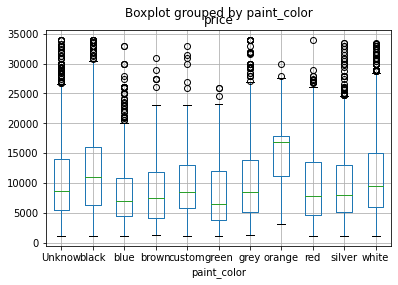

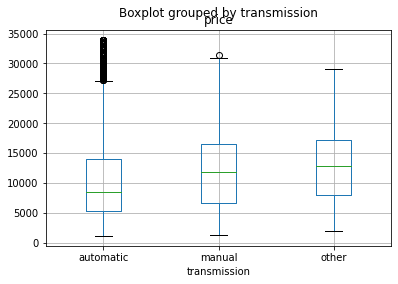

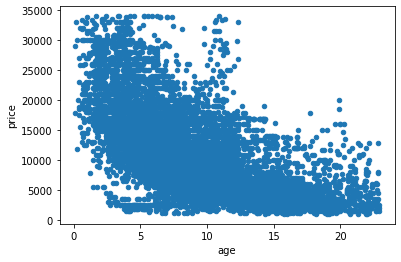

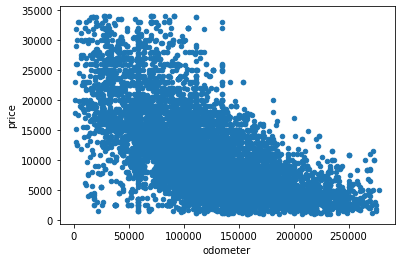

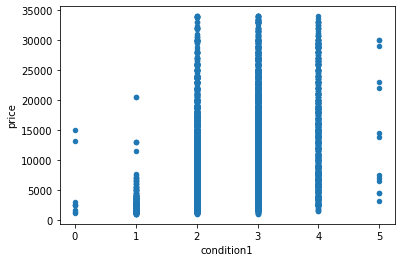

In [122]:
filter_data_type_SUV_color.boxplot(column='price',by='paint_color')
plt.show()
filter_data_type_SUV.boxplot(column='price',by='transmission')
plt.show()
filter_data_type_SUV.plot(y='price',x='age',kind='scatter')
plt.show()
filter_data_type_SUV.plot(y='price',x='odometer',kind='scatter')
plt.show()
filter_data_type_SUV.plot(y='price',x='condition1',kind='scatter')
plt.show()


## Conclusão geral

[Liste suas conclusões importantes nessa seção final, certifique-se que eles incluem aqueles que te levaram à forma como você processou e analisou os dados. Aborde valores ausentes, duplicados, valores atípicos e possíveis razões e soluções para artefatos problemáticos que você teve que direcionar. Não se esqueça de remover todos os comentários entre chaves antes de entregar seu projeto.]

Comecei analisando os dados por o tipo de cada variável e se haviam valores ausentes nelas. Após identificar valores ausentes fiz todas as modificações conforme expliquei anteriormente. Após isso, analise os valores atípicos. Filtrei a tabela retirando os valores muito altos e muito baixos quando pertinentes. Não identifiquei valores duplicados. Analisando os gráficos de dispersão dos 2 tipos veículos com mais anúncios, percebi que existe uma tendencia a correlação negativa entre preço X odometro, preço X age. Preços mais altos estão mais presentes nas condições 3. Já em relação ao tipo de transmissão não consegui ver uma tendencia, já que no SUV o manual tem preço mais alto na média e no Sedan o automático.  